___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [1]:
import seaborn as sns
%matplotlib inline
sns.set_theme(style="darkgrid")

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<Axes: xlabel='sex', ylabel='total_bill'>

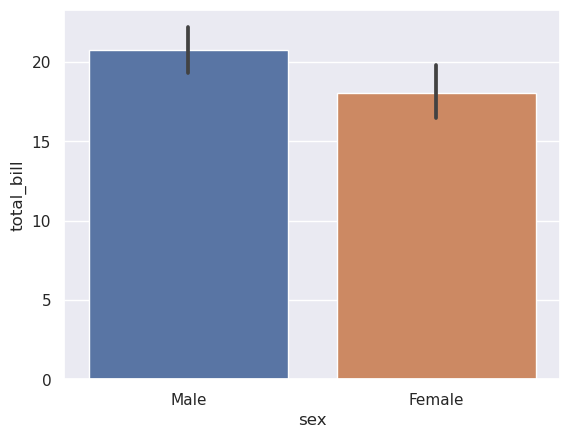

In [5]:
sns.barplot(data=tips, x='sex', y='total_bill')


You can change the estimator object to your own function, that converts a vector to a scalar:

<Axes: xlabel='sex', ylabel='total_bill'>

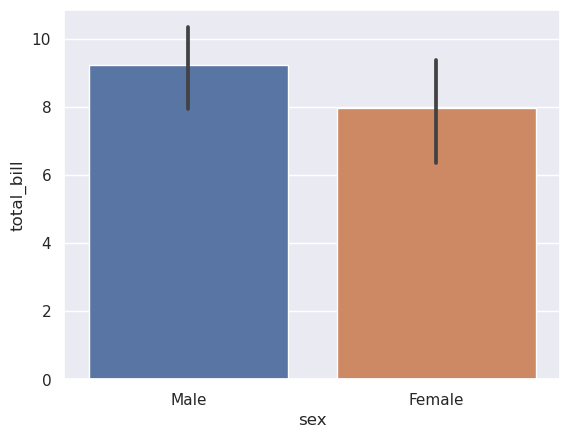

In [7]:
import numpy as np
# estimator by default is mean(average)
sns.barplot(data=tips, x='sex', y='total_bill', estimator=np.std)


### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<Axes: xlabel='sex', ylabel='count'>

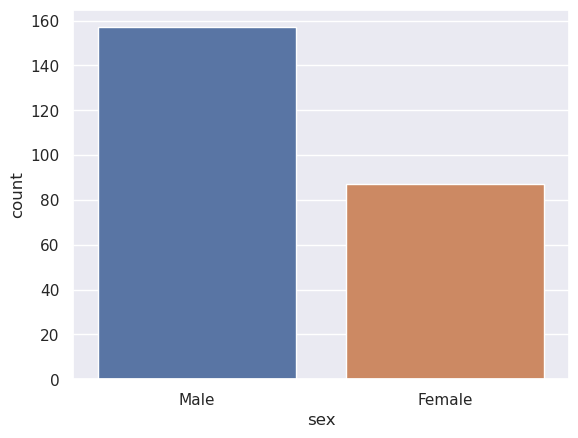

In [8]:
sns.countplot(data=tips, x='sex')

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<Axes: xlabel='day', ylabel='total_bill'>

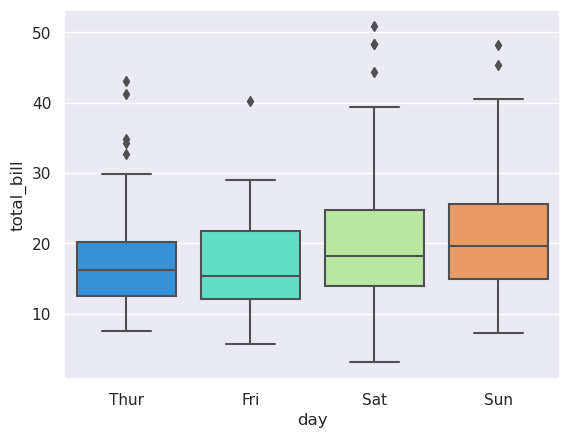

In [9]:
# boxplots show the quartiles of the distribution
# the points outside are outliers
sns.boxplot(data=tips, x="day", y="total_bill", palette='rainbow')

<Axes: xlabel='total_bill', ylabel='day'>

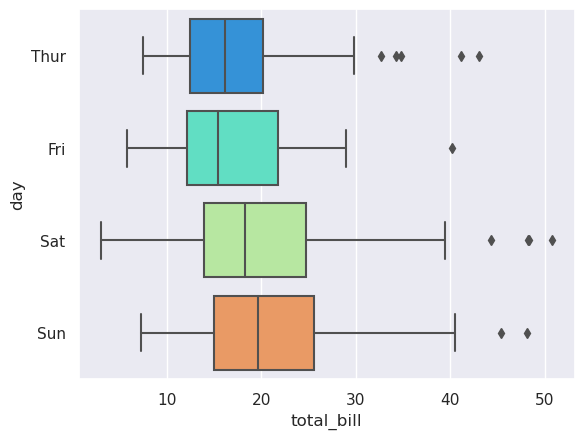

In [15]:
sns.boxplot(data=tips, x="total_bill", y="day", palette='rainbow', orient='h')


<Axes: >

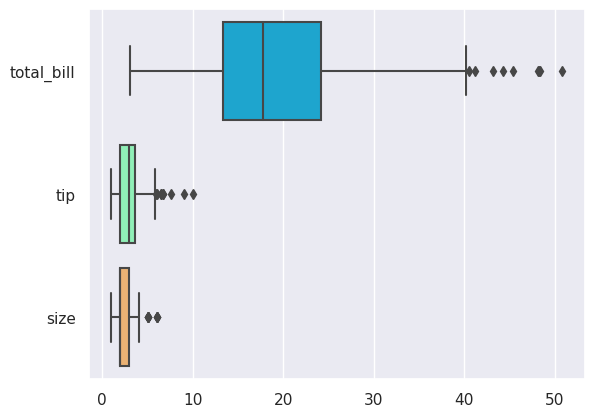

In [11]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips, palette='rainbow', orient='h')


<Axes: xlabel='day', ylabel='total_bill'>

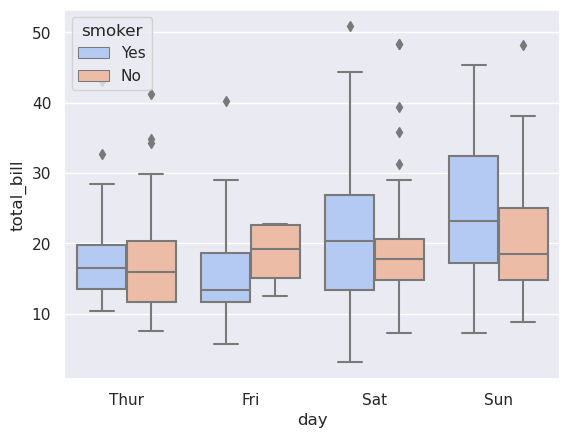

In [13]:
sns.boxplot(
    x="day",
    y="total_bill",
    hue="smoker",
    data=tips,
    palette="coolwarm",
)


### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<Axes: xlabel='day', ylabel='total_bill'>

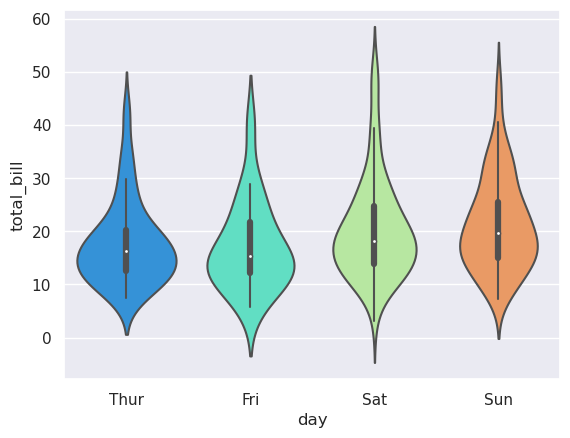

In [18]:
# Violin plots i showing the kernel density estimation of the underlying distribution
# it shows the curve of the distribution as well
sns.violinplot(data=tips, x='day', y='total_bill', palette='rainbow')


<Axes: xlabel='day', ylabel='total_bill'>

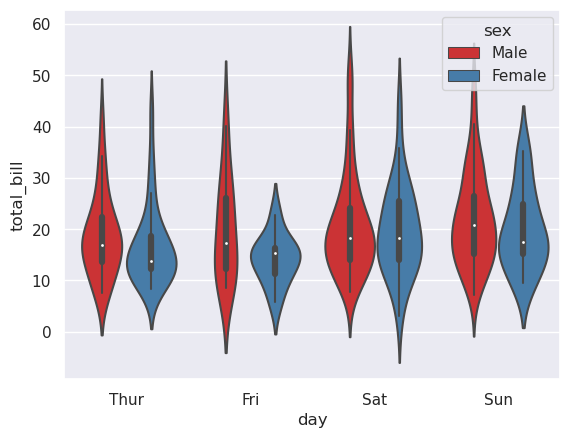

In [19]:
# using hue to split the violin plot
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1')


<Axes: xlabel='day', ylabel='total_bill'>

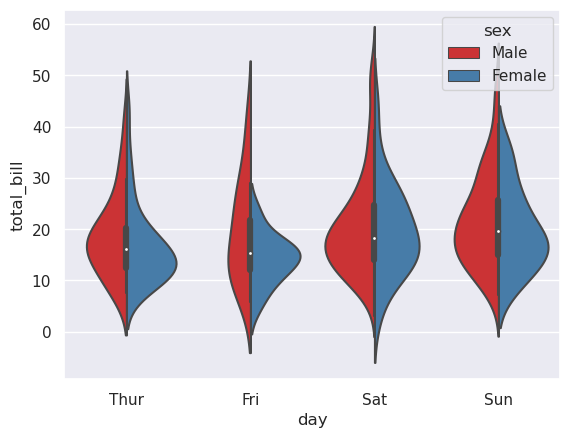

In [22]:
# Using split nad hue to
# directly compare the distributions based of a categorical value
sns.violinplot(
    x="day",
    y="total_bill",
    data=tips,
    hue='sex',
    split=True,
    palette='Set1',
)

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

/tmp/ipykernel_3069/543452254.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


<Axes: xlabel='day', ylabel='total_bill'>

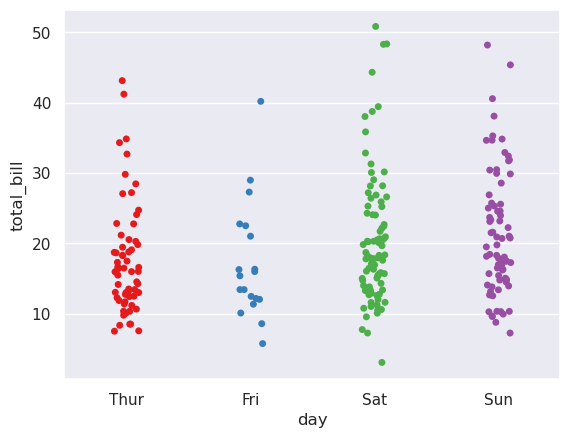

In [29]:
sns.stripplot(
  data=tips,
  x="day",
  y="total_bill",
  palette='Set1',)

/tmp/ipykernel_3069/3448036208.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


<Axes: xlabel='day', ylabel='total_bill'>

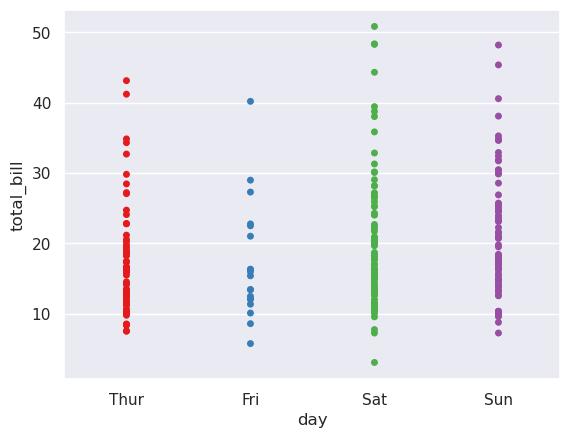

In [32]:
sns.stripplot(
  x="day",
  y="total_bill",
  data=tips,
  jitter=False,
  palette='Set1',
)


<Axes: xlabel='day', ylabel='total_bill'>

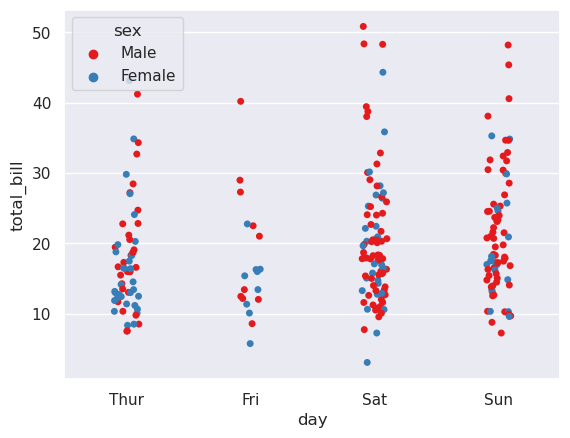

In [34]:
sns.stripplot(x="day",
              y="total_bill",
              data=tips,
              jitter=True,
              hue='sex',
              palette='Set1')


<Axes: xlabel='day', ylabel='total_bill'>

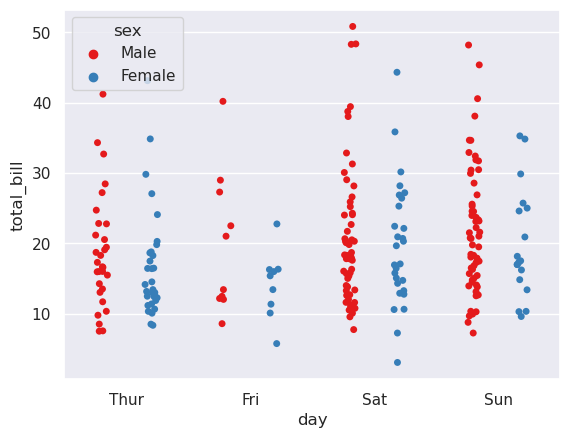

In [36]:
# dodge=True will split the data based on the hue
sns.stripplot(x="day",
              y="total_bill",
              data=tips,
              jitter=True,
              hue='sex',
              palette='Set1',
              dodge=True)


/tmp/ipykernel_3069/3699567959.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x="day", y="total_bill", data=tips, palette='Set1')


<Axes: xlabel='day', ylabel='total_bill'>

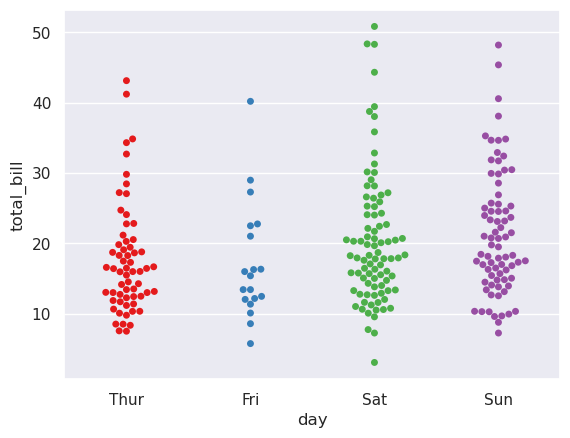

In [38]:
# combine stripplot and violinplot
sns.swarmplot(x="day", y="total_bill", data=tips, palette='Set1')

<Axes: xlabel='day', ylabel='total_bill'>

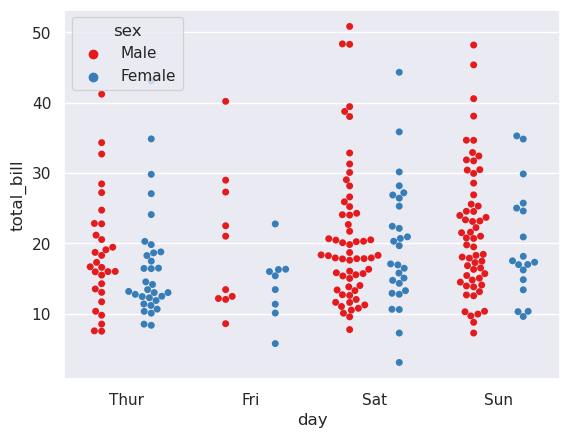

In [41]:
sns.swarmplot(x="day",
              y="total_bill",
              hue='sex',
              data=tips,
              palette="Set1",
              dodge=True)


disadvantages of swarmplot is that in very large datasets, the points dont scale the information properly and it takes a lot of computation to arrange them. Not that useful in general.

### Combining Categorical Plots

<Axes: xlabel='tip', ylabel='day'>

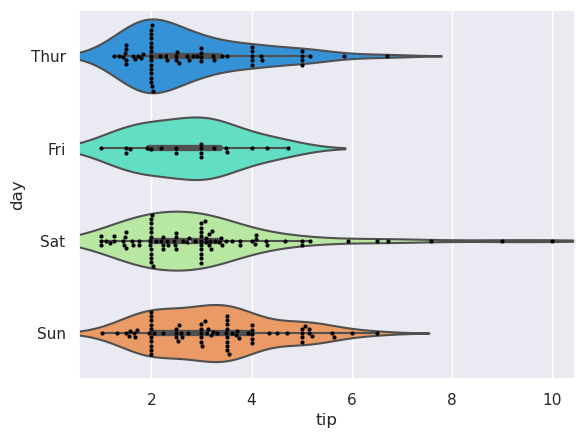

In [42]:
sns.violinplot(x="tip", y="day", data=tips, palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips, color='black', size=3)


More useful to understand the data, not necesarily to show it off and explain it to others.

## factorplot

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

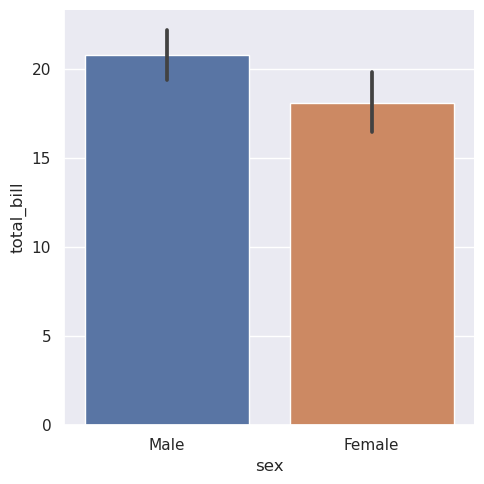

In [44]:
sns.catplot(x='sex', y='total_bill', data=tips, kind='bar')

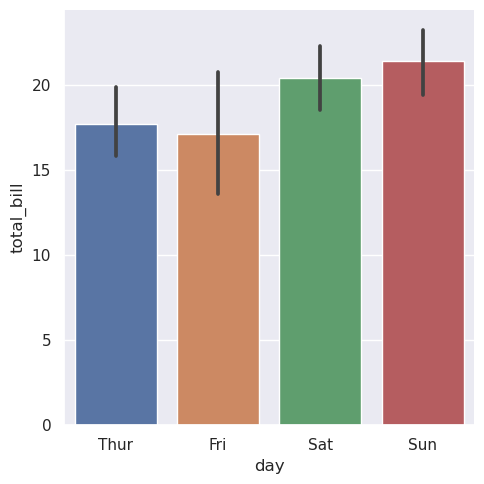

In [45]:
sns.catplot(
  x='day',
  y='total_bill',
  data=tips,
  kind='bar',
)


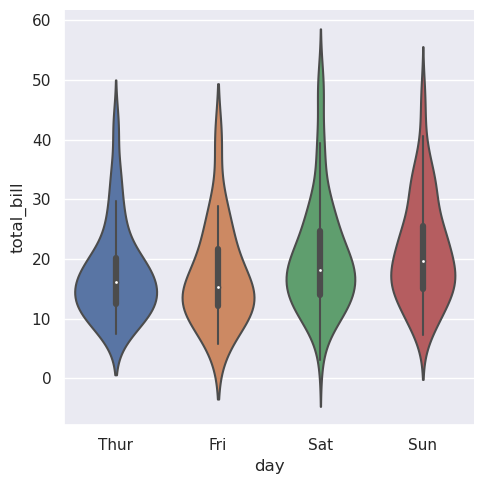

In [47]:
sns.catplot(
  x='day',
  y='total_bill',
  data=tips,
  kind='violin',
)

In [46]:
sns.__version__

'0.12.2'

In [43]:
# sns.factorplot(x='sex', y='total_bill', data=tips, kind='bar')


AttributeError: module 'seaborn' has no attribute 'factorplot'

# Great Job!